In [1]:
import os
from typing import Union, Optional, Tuple

import numpy as np
import pandas as pd

# ASE imports
from ase.build import bulk, stack
from ase.lattice.cubic import BodyCenteredCubic as bcc

# Pyiron workflow imports
import pyiron_workflow as pwf
from pyiron_workflow import Workflow
from pyiron_workflow_atomistics.dataclass_storage import CalcInputMinimize
from pyiron_workflow_atomistics.calculator import calculate_structure_node
from pyiron_workflow_lammps.engine import LammpsEngine

# Pymatgen imports
from pymatgen.core import Structure
from pymatgen.io.ase import AseAtomsAdaptor

%load_ext autoreload
%autoreload 2

# Example for LAMMPS engine
## With cell relaxation
 Note that the CalcInputMinimize is **generic** input - 

 meaning that for any implemented engines, 
 
 setting a flag like input.relax_cell = True will force the engine to execute with that mode

In [2]:
input = CalcInputMinimize()
input.relax_cell = True
Engine = LammpsEngine(EngineInput = input)

Engine.working_directory = "surface_energy"
Engine.lammps_log_filepath = "minimize.log"
# Adjust this line to match your LAMMPS installation
# If you are using conda-lammps or a LAMMPS binary on your system, you can use directly:
Engine.command = "lmp -in in.lmp -log minimize.log"
Engine.input_script_pair_style = "eam/fs"
Engine.path_to_model = os.getcwd() + "/Al-Fe.eam.fs"

wf = Workflow("optimise_cell", delete_existing_savefiles=True)
# /root/github_dev/pyiron_workflow_atomistics/pyiron_workflow_atomistics
structure = bulk("Fe", a=3.05, cubic=True)
wf.calc_cell = calculate_structure_node(
    structure=structure,
    calculation_engine=Engine,
)
wf.run()

/root/miniconda3/envs/pyiron_pypi_workflow_lammps/lib/python3.12/site-packages/pyiron_workflow_lammps/engine.py:113: RuntimeWarning: 'mode' already set to 'minimize' and also implied by EngineInput; no change.
  warnings.warn(
2025-09-26 01:56:33,513 - pyiron_log - WARNING - Directory 'surface_energy' already exists. Existing files may be overwritten.


current mode  minimize


{'calc_cell__calc_output': <pyiron_workflow_atomistics.dataclass_storage.EngineOutput at 0x74b126fb4ec0>}

Atoms(symbols='Fe2', pbc=True, cell=[[2.85000932661248, 1.7451273996880388e-16, 1.7451273996880388e-16], [0.0, 2.85000932661248, 1.7451273996880388e-16], [0.0, 0.0, 2.85000932661248]])
We started with a lattice parameter of 3.050 Å
optimised lattice parameter of the cell: 2.850 Å


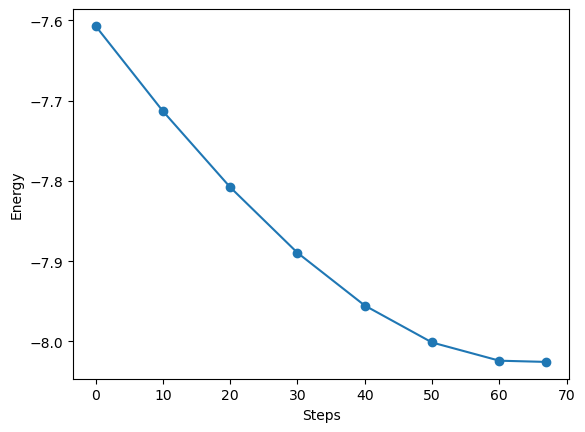

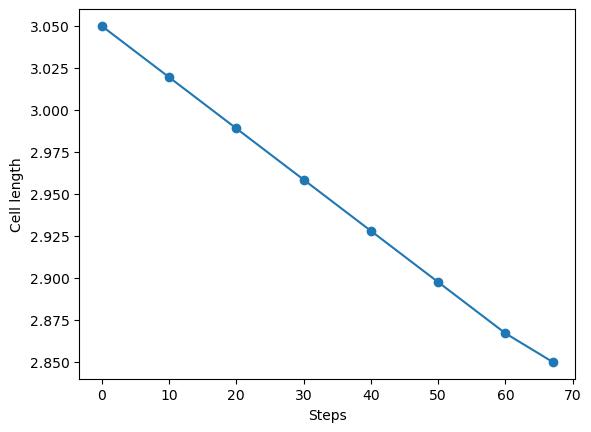

In [3]:
# To access the output, you can use the following:
print(wf.calc_cell.outputs.calc_output.final_structure.value)
print("We started with a lattice parameter of 3.050 Å")
print(f"optimised lattice parameter of the cell: {wf.calc_cell.outputs.calc_output.final_structure.value.cell.lengths()[0]:.3f} Å")

from matplotlib import pyplot as plt
cell_lengths = [s.cell.lengths()[0] for s in wf.calc_cell.outputs.calc_output.structures.value]
steps = wf.calc_cell.outputs.calc_output.value.final_results["generic"]["steps"]
energies = wf.calc_cell.outputs.calc_output.energies.value
plt.plot(steps, energies, marker="o")
plt.xlabel("Steps")
plt.ylabel("Energy")
plt.show()

plt.plot(steps, cell_lengths, marker="o")
plt.xlabel("Steps")
plt.ylabel("Cell length")
plt.show()

## Now without cell relaxation

In [4]:
input = CalcInputMinimize()
# !! NOW WE SET RELAX_CELL TO FALSE
input.relax_cell = False
Engine = LammpsEngine(EngineInput = input)

Engine.working_directory = "surface_energy"
Engine.lammps_log_filepath = "minimize.log"
# Adjust this line to match your LAMMPS installation
# If you are using conda-lammps or a LAMMPS binary on your system, you can use directly:
Engine.command = "lmp -in in.lmp -log minimize.log"
Engine.input_script_pair_style = "eam/fs"
Engine.path_to_model = os.getcwd() + "/Al-Fe.eam.fs"

wf = Workflow("optimise_cell", delete_existing_savefiles=True)
# /root/github_dev/pyiron_workflow_atomistics/pyiron_workflow_atomistics
structure = bulk("Fe", a=3.05, cubic=True)
structure.rattle(0.3)
wf.calc_cell = calculate_structure_node(
    structure=structure,
    calculation_engine=Engine,
)
wf.run()

2025-09-26 01:56:36,481 - pyiron_log - WARNING - Directory 'surface_energy' already exists. Existing files may be overwritten.


current mode  minimize


{'calc_cell__calc_output': <pyiron_workflow_atomistics.dataclass_storage.EngineOutput at 0x74b11d2416a0>}

Atoms(symbols='Fe2', pbc=True, cell=[[3.05, 1.8675863686997136e-16, 1.8675863686997136e-16], [0.0, 3.05, 1.8675863686997136e-16], [0.0, 0.0, 3.05]])
We started with a lattice parameter of 3.050 Å
optimised lattice parameter of the cell: 3.050 Å


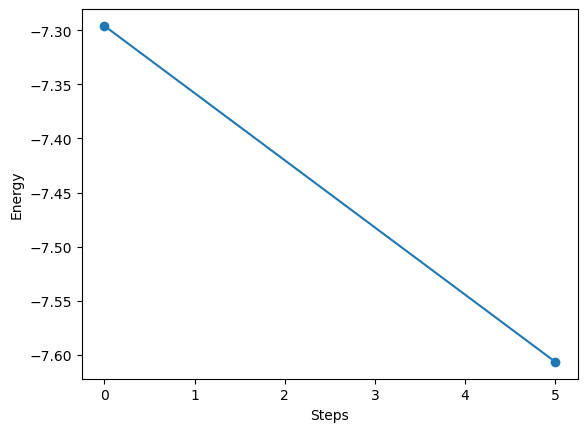

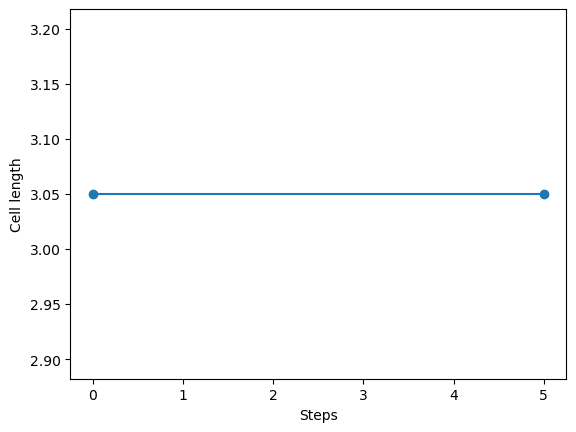

In [5]:
# To access the output, you can use the following:
print(wf.calc_cell.outputs.calc_output.final_structure.value)
print("We started with a lattice parameter of 3.050 Å")
print(f"optimised lattice parameter of the cell: {wf.calc_cell.outputs.calc_output.final_structure.value.cell.lengths()[0]:.3f} Å")

from matplotlib import pyplot as plt
cell_lengths = [s.cell.lengths()[0] for s in wf.calc_cell.outputs.calc_output.structures.value]
steps = wf.calc_cell.outputs.calc_output.value.final_results["generic"]["steps"]
energies = wf.calc_cell.outputs.calc_output.energies.value
plt.plot(steps, energies, marker="o")
plt.xlabel("Steps")
plt.ylabel("Energy")
plt.show()

plt.plot(steps, cell_lengths, marker="o")
plt.xlabel("Steps")
plt.ylabel("Cell length")
plt.show()